# Linear Regression Consulting Project

Congratulations! You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and use it to predict how many crew members the ships will need.

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis! 

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

In [15]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [16]:
spark = SparkSession.builder.appName('linear_reg').getOrCreate()

In [17]:
df = spark.read.csv(r'C:\Users\LCL0512PA\repos\py_spark_training\Python-and-Spark-for-Big-Data-master\Spark_for_Machine_Learning\Linear_Regression\cruise_ship_info.csv',
                    inferSchema = True, header = True)

In [18]:
## How many crew members are required by ship?
df.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

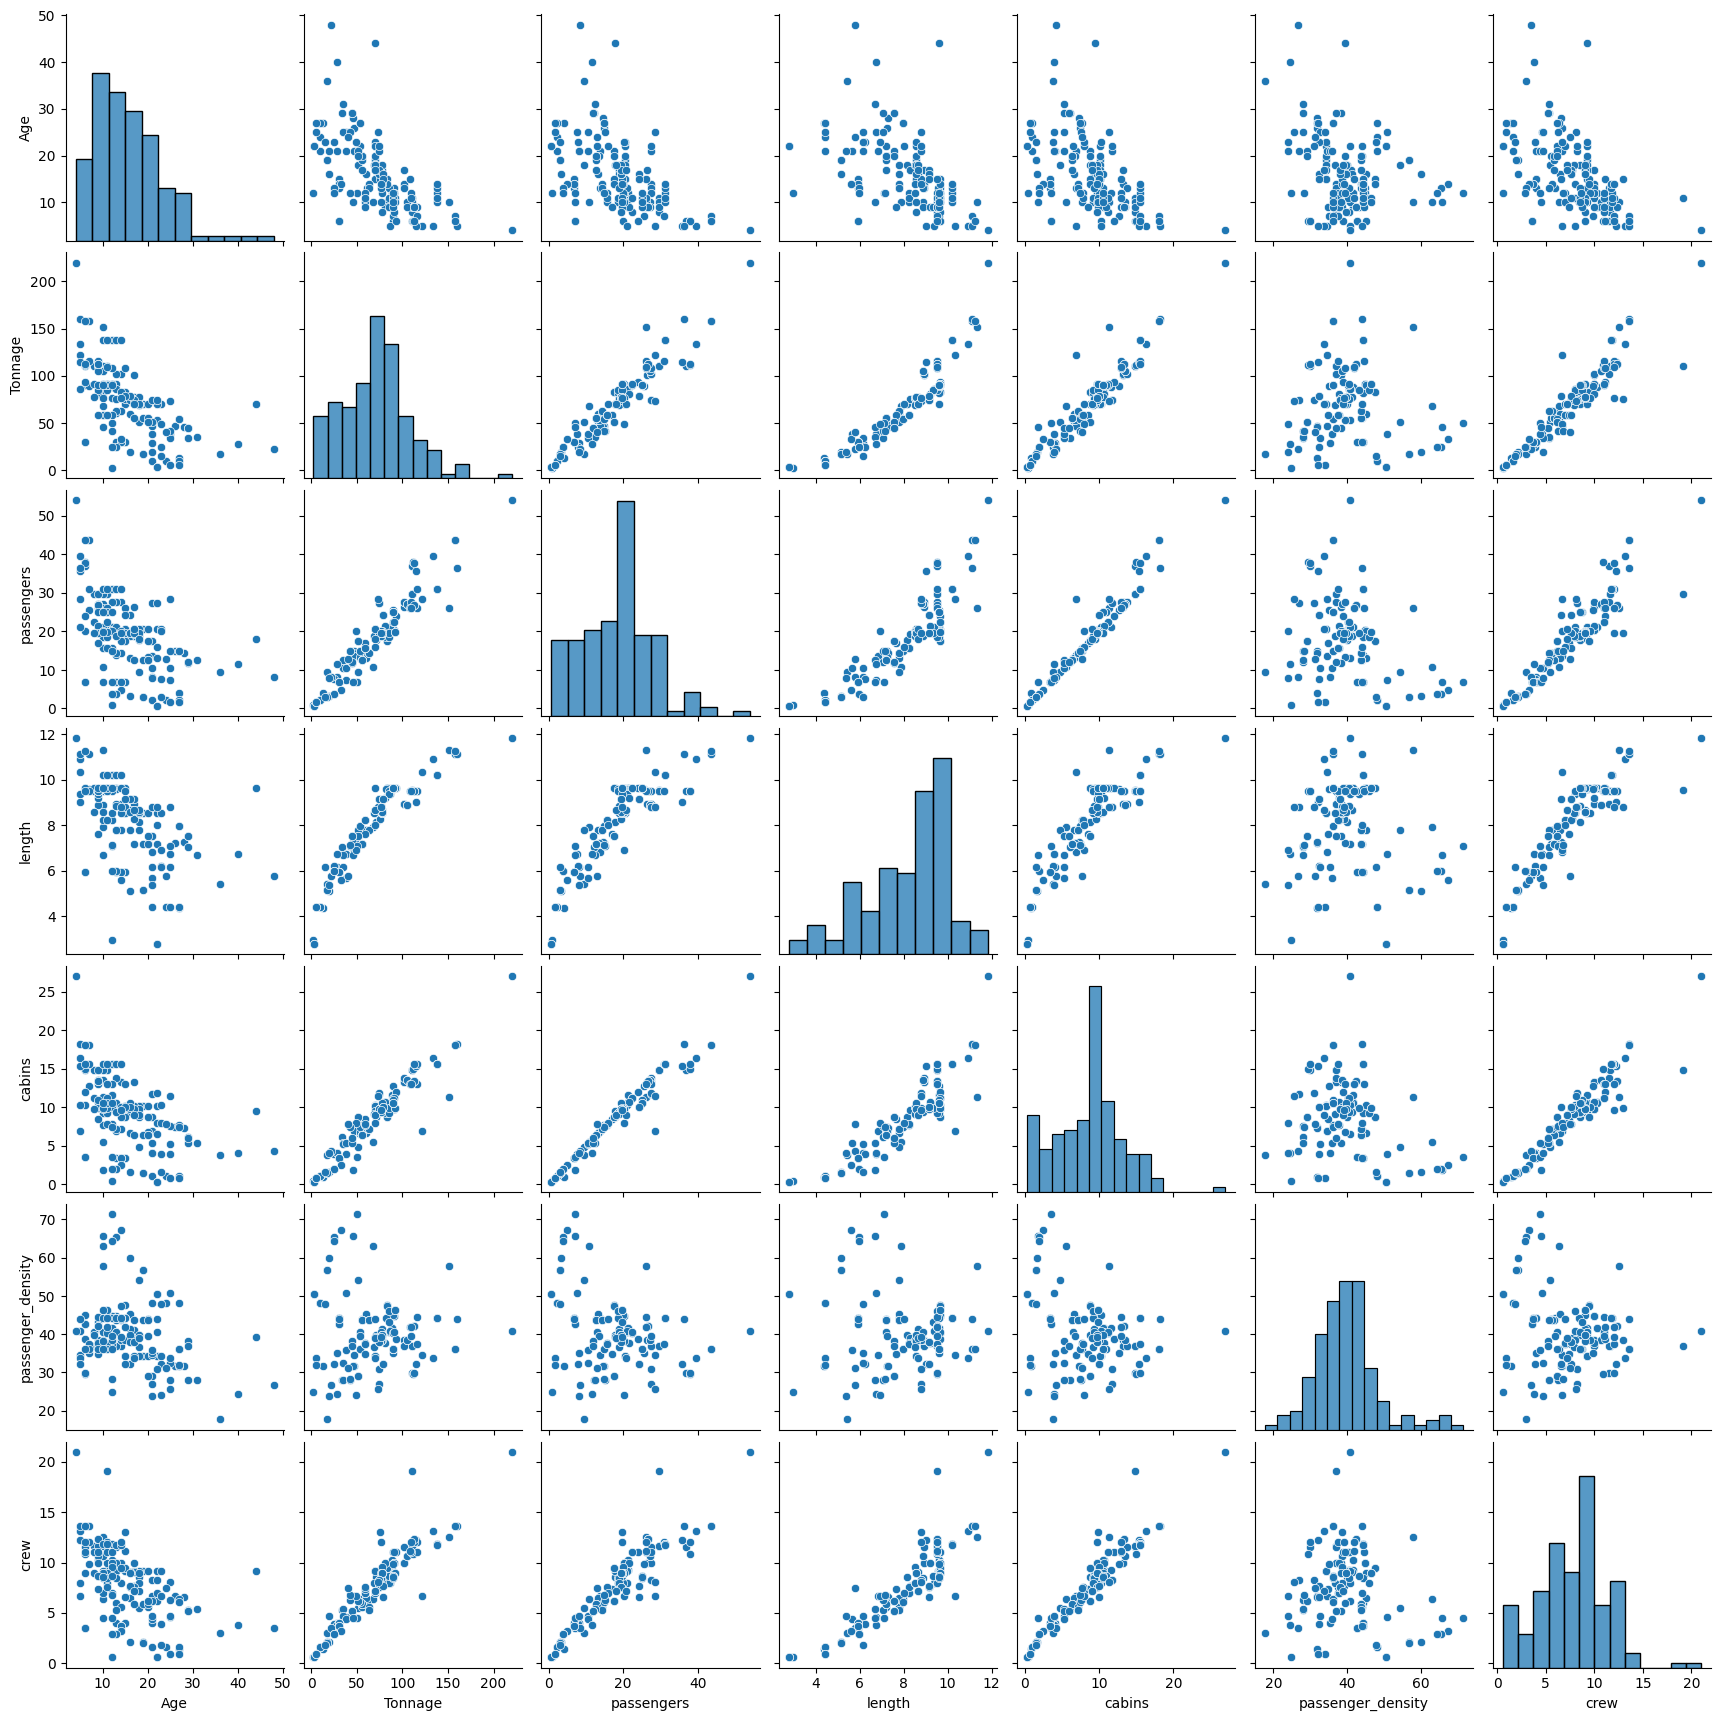

In [20]:
import seaborn as sns

pd_df = df.toPandas()
sns.pairplot(pd_df)

In [21]:
## importing Vector assembler and vectors to do feature selection
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [22]:
## printing columns to add to vector assembler
df.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [23]:
## the vector assembler helps to create a feature that blends all numeric predictors.
## setting up the assembler
assembler = VectorAssembler(
    inputCols = ['Tonnage', 'passengers', 'length', 'cabins'],
    outputCol = 'features'
)

In [24]:
assemble_df = assembler.transform(df)

In [25]:
assemble_df.select("features").show()

+--------------------+
|            features|
+--------------------+
|[30.2769999999999...|
|[30.2769999999999...|
|[47.262,14.86,7.2...|
|[110.0,29.74,9.53...|
|[101.353,26.42,8....|
|[70.367,20.52,8.5...|
|[70.367,20.52,8.5...|
|[70.367,20.56,8.5...|
|[70.367,20.52,8.5...|
|[110.238999999999...|
|[110.0,29.74,9.51...|
|[46.052,14.52,7.2...|
|[70.367,20.52,8.5...|
|[70.367,20.52,8.5...|
|[86.0,21.24,9.63,...|
|[110.0,29.74,9.51...|
|[88.5,21.24,9.63,...|
|[70.367,20.52,8.5...|
|[88.5,21.24,9.63,...|
|[70.367,20.52,8.5...|
+--------------------+
only showing top 20 rows



In [26]:
## New df check
assemble_df.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+--------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|            features|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+--------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|[30.2769999999999...|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|[30.2769999999999...|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|[47.262,14.86,7.2...|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|[110.0,29.74,9.53...|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|[101.353,26.42,8....|
|    Ecstasy|   Carnival| 22|            70.367|     20.

In [27]:
final_df = assemble_df.select("features", "crew")

In [30]:
train_data, test_data = final_df.randomSplit([0.75, 0.25])

In [31]:
train_data.describe().show()

+-------+-----------------+
|summary|             crew|
+-------+-----------------+
|  count|              109|
|   mean|7.941009174311928|
| stddev|3.573151929722275|
|    min|             0.59|
|    max|             21.0|
+-------+-----------------+



In [32]:
test_data.describe().show()

+-------+------------------+
|summary|              crew|
+-------+------------------+
|  count|                49|
|   mean| 7.467551020408163|
| stddev|3.3560433863232983|
|    min|              0.88|
|    max|             13.13|
+-------+------------------+



In [33]:
## creating linear regression
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='crew')

In [34]:
lrModel = lr.fit(train_data,)

In [35]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients, lrModel.intercept) )

Coefficients: [0.01479201120743451,-0.16569955498246017,0.4192943577219563,0.8266570266310569] Intercept: -0.8900535696542287


In [36]:
results = lrModel.evaluate(test_data)

In [38]:
results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-0.48898680716842724|
|-0.01782994972950...|
|-0.01782994972950...|
|  0.2624280930891305|
| -0.8943311549423345|
| -0.1466069339874081|
|-0.22734576730796796|
|-0.16377795746944024|
|   0.257805286460127|
|-0.02122091939562...|
|    0.41431174505502|
|  1.5257299537838316|
|  0.1650094138946816|
|  0.0177093477504231|
| -0.8323672702299341|
| -0.5049347091600707|
|-0.19988728832673353|
|-0.19988728832673353|
|-0.16989224967601313|
|0.007558730684874...|
+--------------------+
only showing top 20 rows



In [40]:
# using test data to make predictions
unlabeled_data = test_data.select('features')

In [41]:
predictions = lrModel.transform(unlabeled_data)

In [42]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[5.35,1.67,4.4,0.74]|1.3689868071684272|
|[10.0,2.08,4.4,1.04]|1.6178299497295061|
|[10.0,2.08,4.4,1.04]|1.6178299497295061|
|[12.5,3.94,4.36,0...|1.1975719069108695|
|[14.745,3.08,6.17...|2.6943311549423345|
|[16.8,2.96,5.14,1...| 2.246606933987408|
| [19.2,3.2,5.13,1.6]| 2.337345767307968|
|[28.43,8.08,6.16,...|  4.16377795746944|
|[30.2769999999999...| 3.742194713539873|
|[30.2769999999999...|3.7512209193956254|
|[42.0,14.8,7.13,7.4]|  6.38568825494498|
| [46.0,7.0,6.7,1.82]| 2.944270046216168|
|[46.052,14.52,7.2...| 6.434990586105318|
|[52.926,13.02,7.1...| 6.152290652249577|
|[53.872,14.94,7.9...| 6.952367270229934|
|[55.451,12.64,7.1...| 6.074934709160071|
|[55.451,12.66,7.1...| 6.079887288326733|
|[55.451,12.66,7.1...| 6.079887288326733|
|[58.825,15.6,8.23...| 7.169892249676013|
|[59.058,17.0,7.63...| 7.392441269315126|
+--------------------+------------

In [45]:
print("RMSE: {}".format(results.rootMeanSquaredError))
print("MSE: {}".format(results.meanSquaredError))
print("R2: {}".format(results.r2))

RMSE: 0.7072137190876087
MSE: 0.5001512444657271
R2: 0.9546683984244166


In [47]:
from pyspark.sql.functions import corr

In [48]:
df.select(corr('crew','passengers')).show()

+----------------------+
|corr(crew, passengers)|
+----------------------+
|    0.9152341306065384|
+----------------------+



In [49]:
df.select(corr('crew','cabins')).show()

+------------------+
|corr(crew, cabins)|
+------------------+
|0.9508226063578497|
+------------------+

